In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()

In [14]:
df = pd.read_excel('../data/coalpublic2013.xls', header=3, index_col='MSHA ID')
df.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)
df.head()


,year,mine_name,mine_state,mine_county,mine_status,mine_type,company_type,operation_type,operating_company,operating_company_address,union_code,coal_supply_region,production_(short_tons),average_employees,labor_hours
MSHA ID,,,,,,,,,,,,,,,
103381,2013,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392
103404,2013,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447
100759,2013,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784
103246,2013,Bear Creek,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193
103451,2013,Knight Mine,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393


In [15]:
df.company_type.unique()

array([u'Indepedent Producer Operator', u'Operating Subsidiary',
       u'Contractor'], dtype=object)

In [16]:
df.company_type.replace('Indepedent Producer Operator', 'Independent Producer Operator', inplace=True)

In [18]:
df.company_type.unique()

array(['Independent Producer Operator', u'Operating Subsidiary',
       u'Contractor'], dtype=object)

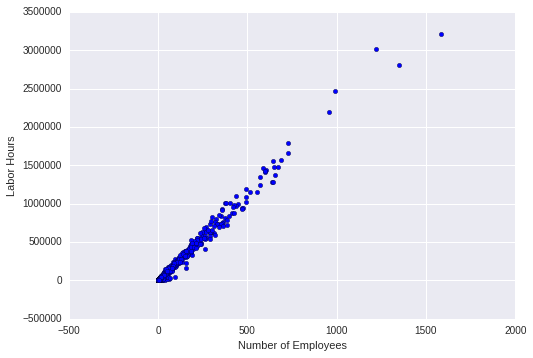

In [21]:
plt.scatter(df.average_employees, df.labor_hours)
plt.xlabel('Number of Employees')
plt.ylabel('Labor Hours')

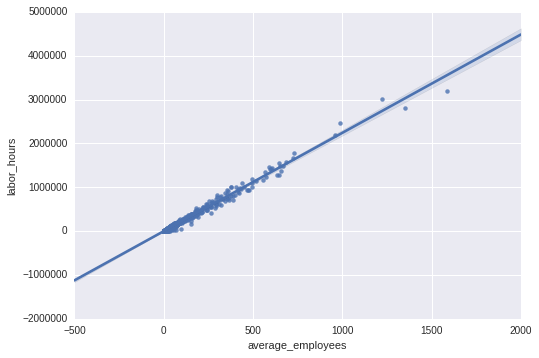

In [22]:
sns.regplot(df.average_employees, df.labor_hours)

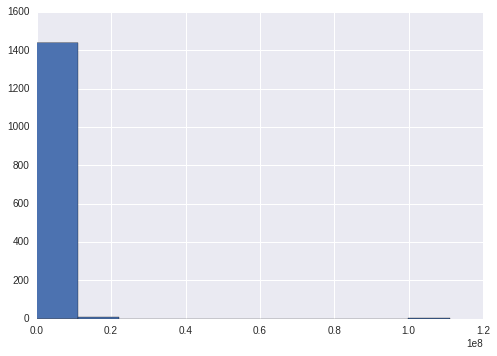

In [23]:
df['production_(short_tons)'].hist()

In [25]:
df = df[df['production_(short_tons)'] > 0]

In [26]:
df.shape

(1061, 15)

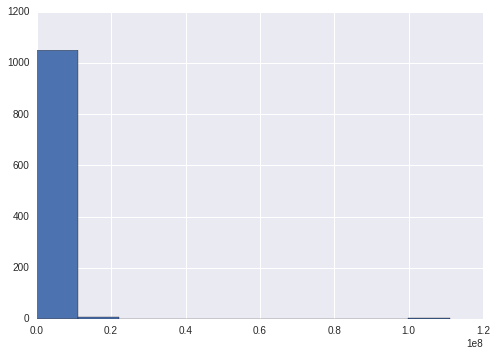

In [27]:
df['production_(short_tons)'].hist()

In [28]:
df['log_production'] = np.log(df['production_(short_tons)'])

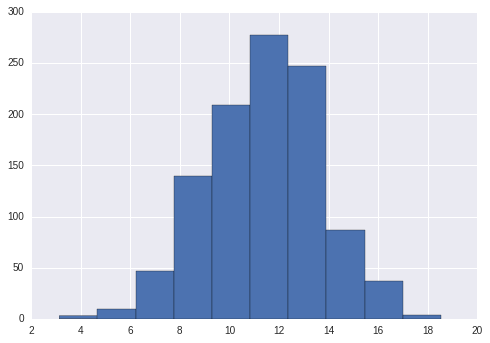

In [29]:
df.log_production.hist()

In [30]:
df.to_csv('../data/cleaned_coalpublic2013.csv')